In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from matplotlib import cm
import matplotlib.ticker as ticker
from matplotlib.ticker import LinearLocator


#get the paths to be able to import functions and csv files
%cd /Users/ronja/Documents/GitHub/neural-fields-local

import sys
sys.path.append('/Users/ronja/Documents/GitHub/neural-fields-local/py')
csv_path = '/Users/ronja/Documents/GitHub/neural-fields-local/csv'
sys.path.append(csv_path)

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

/Users/ronja/Documents/GitHub/neural-fields-local


In [24]:
from vvf.opticalFlow import runOpticalFlow
from vvf.patternDetection import findContourPaths, contourMatrix, classifyCriticalPoints, avgNormVelocity

#Import the 2-dimensional model
import twoD.continuum2d as continuum2d
c2d = continuum2d.continuum2d()

#import function to set parameters with the option to change specfic ones
from twoD.params2d import setParams

#import from twoD-folder the functions to determine the fixed points, their stability and whether they undergo a violation 
from twoD.analysis2d import computeFPs

2d Model initialised.


In [10]:
ee = 0.4 #-0.1
ii = -0.05 #-0.8
params = {'I_e': ee, 'I_i': ii, 'n': 128, 'm': 128, 'end_t': 3*1000, 'pic_nmb': 14, 'xlength': 20, 'ylength': 20} 

params = setParams(params)
fps = computeFPs(params)

print('fixed points %s' %str(fps))

fixed points [[0.12705209 0.45258016]
 [0.90883709 0.9999645 ]
 [0.95197467 0.99998258]]


In [11]:

ue, ui = c2d.run(params, itype='inte_adaptation', fp=fps[0])

adaps shape=(128, 128), e-shae=(128, 128), inh-shape=(128, 128)


In [12]:
#Transform from dimension (T x X x Y) to dimension ()
data = np.array(ue).T 

In [13]:
u, v, conv = runOpticalFlow(data, nSteps=50)

VVF at time step 0 is calculated


/Users/ronja/Documents/GitHub/neural-fields-local/vvf/opticalFlow.py:12: RuntimeWarning: invalid value encountered in reciprocal
  return (2*np.sqrt(x + beta**2))**(-1)


VVF at time step 10 is calculated


In [19]:
ee = 0.45 #-0.1
ii = -0.1 #-0.8
params2 = {'I_e': ee, 'I_i': ii, 'n': 128, 'm': 128, 'end_t': 3*1000, 'pic_nmb': 14, 'xlength': 20, 'ylength': 20} 

params2 = setParams(params2)
fps2 = computeFPs(params2)

print('fixed points %s' %str(fps2))

fixed points [[0.16184587 0.49064251]
 [0.86560342 0.99990701]
 [0.97243405 0.99998404]]


In [20]:

ue2, ui2 = c2d.run(params2, itype='inte_adaptation', fp=fps2[0])

adaps shape=(128, 128), e-shae=(128, 128), inh-shape=(128, 128)


In [21]:
#Transform from dimension (T x X x Y) to dimension ()
data2 = np.array(ue2).T 
u2, v2, conv2 = runOpticalFlow(data2, nSteps=50)

VVF at time step 0 is calculated
VVF at time step 10 is calculated


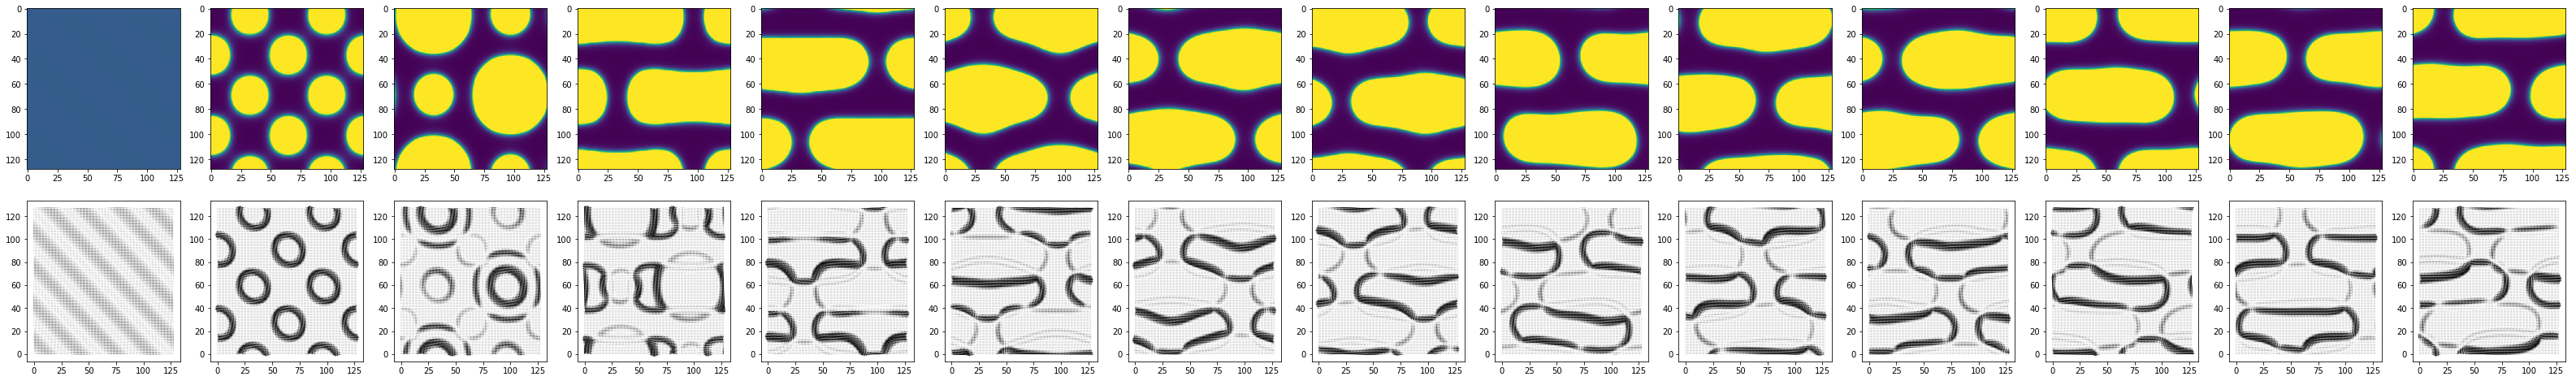

In [17]:
amount = len(u.T)-1
fig, axes = plt.subplots(2, amount, figsize=(4*amount,8))

# Generate a grid of points
x = np.arange(0, u.T[1].shape[1])
y = np.arange(0, v.T[1].shape[0])
X, Y = np.meshgrid(x, y)


for im in range(len(u.T)-1):
#    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(10,5))
    axes[0,im].imshow(data.T[im+1][::-1], vmin=0, vmax=1, aspect='auto')
    axes[1,im].quiver(X, Y, u.T[im], v.T[im])      
plt.show()

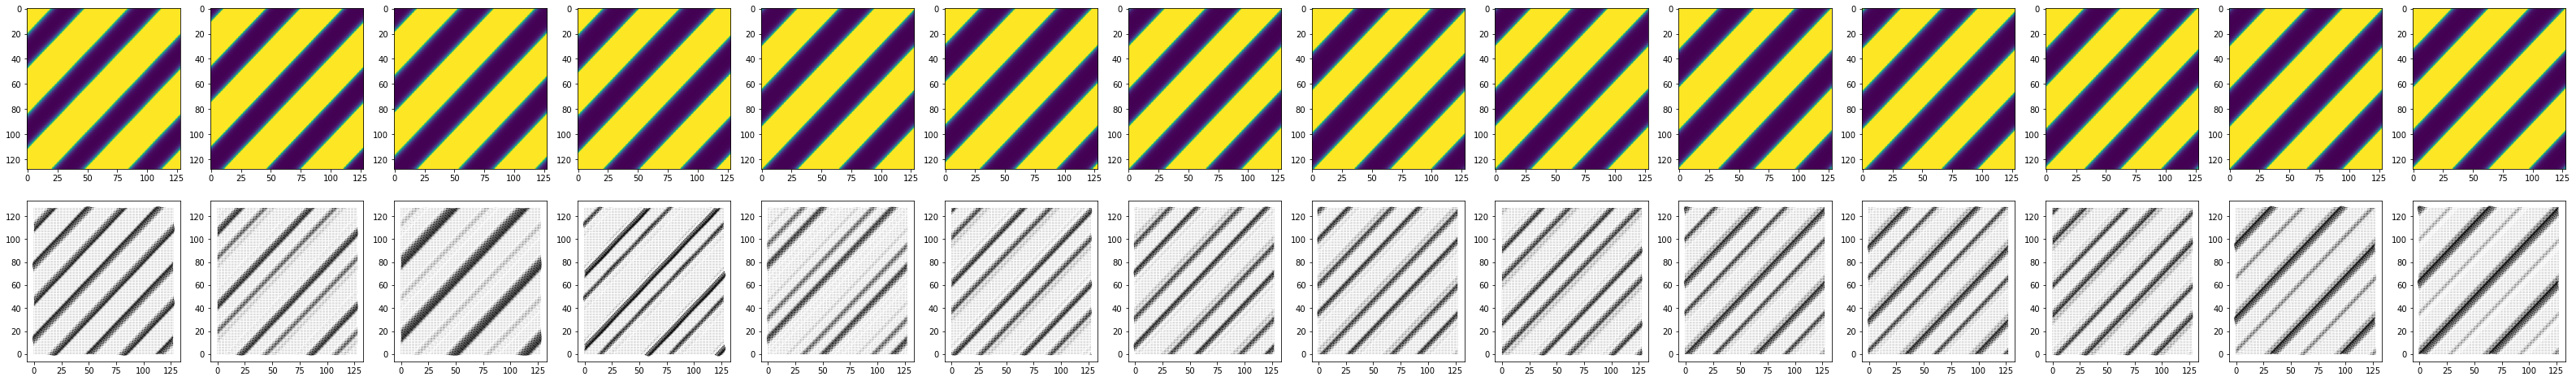

In [22]:
amount = len(u2.T)-1
fig, axes = plt.subplots(2, amount, figsize=(4*amount,8))

# Generate a grid of points
x = np.arange(0, u.T[1].shape[1])
y = np.arange(0, v.T[1].shape[0])
X, Y = np.meshgrid(x, y)


for im in range(amount):
#    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(10,5))
    axes[0,im].imshow(data2.T[im+1][::-1], vmin=0, vmax=1, aspect='auto')
    axes[1,im].quiver(X, Y, u2.T[im], v2.T[im])      
plt.show()

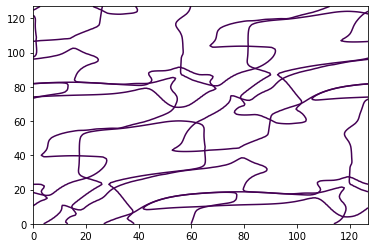

In [25]:
which = -2
u_conts = findContourPaths(u.T[which])
v_conts = findContourPaths(v.T[which])

In [26]:
phi_t = avgNormVelocity(u.T[which], v.T[which])
phi_t

1.0

In [27]:
xcrossings = contourMatrix(u.T[which], u_conts)
ycrossings = contourMatrix(v.T[which], v_conts)
critcells = xcrossings * ycrossings

Text(0.5, 1.0, 'intersections $u$ and $v$')

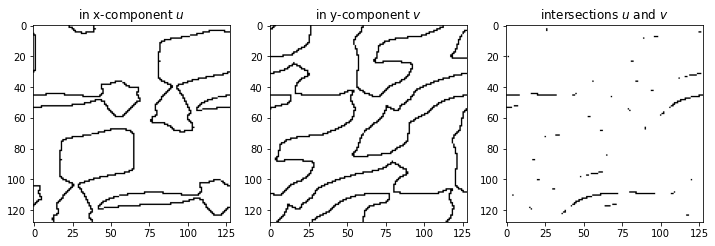

In [41]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12, 4))

fig.set_label('Positions of VVF-contour-lines')

ax0.imshow(xcrossings.T[::-1], cmap='Greys')
ax0.set_title('in x-component ' + r'$u$')

ax1.imshow(ycrossings.T[::-1], cmap='Greys')
ax1.set_title('in y-component ' + r'$v$')

ax2.imshow(critcells.T[::-1], cmap='Greys')
ax2.set_title('intersections ' + r'$u$' + ' and ' r'$v$')


In [28]:
xcoords = np.argwhere(critcells==1)

In [29]:
a,b,c,d = classifyCriticalPoints(xcoords[:,0], xcoords[:,1], u.T[which], v.T[which])

In [30]:
types = np.zeros(len(c))

for idx, color in enumerate(c):
    if color[-5:] == 'Focus':
        if color[0] == 's':
            types[idx] = 4
        else:
            types[idx] = 3
    elif color[-4:] == 'Node':
        if color[0] == 's':
            types[idx] = 2
        else:
            types[idx] = 1

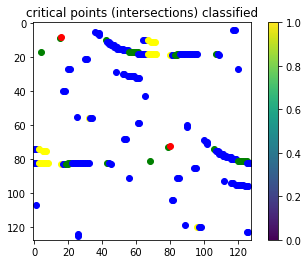

In [42]:
plt.imshow(np.zeros(u.T[which].shape), cmap='Greys')
plt.title(label='critical points (intersections) classified')

cos = ['blue', 'green', 'yellow', 'red', 'pink']

for idx, coord in enumerate(xcoords):
    plt.scatter(coord[0], coord[1], c=cos[types[idx].astype(int)])
